# Thesis data generation and analysis

## Data Generator

In [1]:
import os
import numpy as np
import string
import random

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

# plotting config
plt.style.use('seaborn-talk')
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

np.random.seed(2424)

N_SAMPLES = 10000

MIN_TRANS = 100
MAX_TRANS = 3000
INCREMENT = 50

In [3]:

def random_string(length):
    return ''.join(random.choice(string.ascii_letters) for m in range(length))

def gen_string(b_length):
    return random_string(b_length)

In [4]:
# repeat incrementing number of blocks of 50
for i in range(MIN_TRANS, MAX_TRANS, INCREMENT):
    # generate i uniformly randomly distributed integers n
    # between 900 and 1100. the block length is n*8 bytes
    lengths = np.rint(np.random.uniform(900, 1100, i))
    
    # the function gen_string is vectorized, ready to 
    # process arrays 
    vfunc = np.vectorize(gen_string)
    
    # generates strings of given lengths
    samples = vfunc(lengths.astype(int))
    
    # write to specific file, one transaction per row 
    with open('samples/uniform_samples_' + str(i) + '.txt', 'w') as output:
        for sample in samples:
            output.write(sample + '\n')

KeyboardInterrupt: 

Text(0,0.5,'Execution Time (µs)')

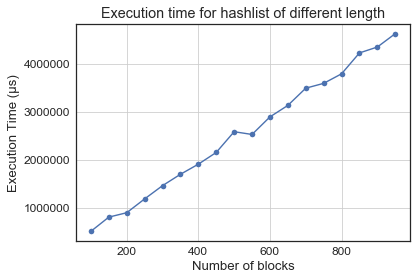

In [23]:
# read results from file
results = np.loadtxt('results/results.txt', delimiter=',')

# define intervals for x-axis
# TODO: change 1000 to MAX_TRANS when running experiment on whole dataset
lenghts = np.arange(MIN_TRANS, 1000, INCREMENT, dtype=float)

# build plot (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
plt.plot(lenghts, results, marker='o')
plt.title('Execution time for hashlist of different length')
plt.grid(True)
plt.xlabel('Number of blocks')
plt.ylabel('Execution Time (µs)')